In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
import seaborn as sns
warnings.filterwarnings("ignore", category=UserWarning)

In [11]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [12]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

# Class distributions

### Normalized (%)

In [13]:
class_distribution_normalized = classifier_utils.get_projects_class_distribution(projects)

class_distribution_normalized

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,43.87,29.25,8.43,1.32,0.92,16.07,0.13
1,apache/directory-server,47.39,51.23,0.15,0.00,0.00,1.23,0.00
2,android/platform_frameworks_base,70.77,7.64,9.02,2.68,1.42,8.13,0.33
3,freenet/fred,40.42,16.50,23.32,6.23,0.49,12.94,0.10
4,alexo/wro4j,30.70,14.77,28.65,0.88,1.02,23.61,0.37
5,apache/lucene-solr,25.05,26.59,20.33,5.24,0.31,21.66,0.82
6,elastic/elasticsearch,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,getrailo/railo,31.99,37.76,8.74,7.17,0.35,13.81,0.17
8,atlasapi/atlas,24.04,44.50,12.40,5.37,0.90,12.53,0.26
9,hibernate/hibernate-orm,23.88,20.11,31.15,7.40,1.12,14.11,2.23


### Count

In [14]:
class_distribution_count = classifier_utils.get_projects_class_distribution(projects, False)

class_distribution_count

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,333,222,64,10,7,122,1
1,apache/directory-server,309,334,1,0,0,8,0
2,android/platform_frameworks_base,1741,188,222,66,35,200,8
3,freenet/fred,409,167,236,63,5,131,1
4,alexo/wro4j,420,202,392,12,14,323,5
5,apache/lucene-solr,244,259,198,51,3,211,8
6,elastic/elasticsearch,0,0,0,0,0,0,0
7,getrailo/railo,183,216,50,41,2,79,1
8,atlasapi/atlas,188,348,97,42,7,98,2
9,hibernate/hibernate-orm,171,144,223,53,8,101,16


# Decision Tree

### Base classifier

In [15]:
dt = DecisionTreeClassifier(min_samples_split=5, random_state=99)
result_dt = classifier_utils.ProjectsResults(dt, projects, non_features_columns)

In [16]:
report_dt = result_dt.get_report_df()

report_dt

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
26,CCI-MIT__XCoLab,5512,3757,0.973,0.971,0.972,0.971,0.573,0.931
1,apache__directory-server,845,652,0.922,0.923,0.923,0.923,0.512,0.843
24,jgralab__jgralab,2072,1802,0.823,0.819,0.820,0.819,0.491,0.643
19,Unidata__thredds,1154,950,0.902,0.901,0.901,0.901,0.777,0.557
18,apache__accumulo,4113,3148,0.838,0.835,0.836,0.835,0.635,0.548
10,CloudStack-extras__CloudStack-archive,1424,1106,0.699,0.700,0.699,0.700,0.437,0.467
0,Ramblurr__Anki-Android,892,759,0.678,0.681,0.679,0.681,0.439,0.432
5,apache__lucene-solr,1256,974,0.573,0.568,0.569,0.568,0.266,0.411
7,getrailo__railo,815,572,0.636,0.631,0.633,0.631,0.378,0.407
11,TeamDev-Ltd__OpenFaces,2979,2859,0.964,0.963,0.964,0.963,0.938,0.403


### Inspect project

In [17]:
sample_project_dt = result_dt.get_project('CCI-MIT__XCoLab')

,precision,recall,f1-score,support
Combination,0.259259,0.368421,0.304348,19.000000
ConcatenationV1V2,0.214286,0.333333,0.260870,9.000000
ConcatenationV2V1,0.000000,0.000000,0.000000,2.000000
Manual,0.959531,0.964668,0.962093,934.000000
Version 1,0.988377,0.987459,0.987918,2153.000000
Version 2,0.974441,0.953125,0.963665,640.000000
accuracy,0.970721,0.970721,0.970721,0.970721
macro avg,0.565982,0.601168,0.579816,3757.000000
weighted avg,0.972764,0.970721,0.971642,3757.000000


None

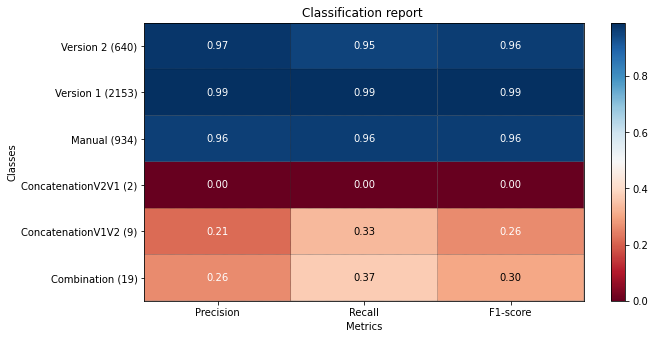

In [18]:
display(sample_project_dt.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project_dt.scores))

### Tuning hyperparameters (TODO)

# Random Forest

### Base classifier

In [19]:
rf = RandomForestClassifier(random_state=99)
result_rf = classifier_utils.ProjectsResults(rf, projects, non_features_columns)

In [20]:
report_rf = result_rf.get_report_df()

report_rf

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
26,CCI-MIT__XCoLab,5512,3757,0.970,0.974,0.971,0.974,0.573,0.938
1,apache__directory-server,845,652,0.921,0.925,0.923,0.925,0.512,0.846
24,jgralab__jgralab,2072,1802,0.871,0.873,0.871,0.873,0.491,0.751
10,CloudStack-extras__CloudStack-archive,1424,1106,0.801,0.807,0.802,0.807,0.437,0.657
19,Unidata__thredds,1154,950,0.905,0.914,0.906,0.914,0.777,0.613
18,apache__accumulo,4113,3148,0.847,0.855,0.850,0.855,0.635,0.602
0,Ramblurr__Anki-Android,892,759,0.717,0.744,0.724,0.744,0.439,0.545
7,getrailo__railo,815,572,0.691,0.705,0.697,0.705,0.378,0.525
5,apache__lucene-solr,1256,974,0.643,0.650,0.644,0.650,0.266,0.523
11,TeamDev-Ltd__OpenFaces,2979,2859,0.967,0.970,0.968,0.970,0.938,0.506


### Inspect project

In [21]:
sample_project_rf = result_rf.get_project('alexo__wro4j')

,precision,recall,f1-score,support
Combination,0.588764,0.668367,0.626045,392.00000
ConcatenationV1V2,0.000000,0.000000,0.000000,12.00000
ConcatenationV2V1,0.333333,0.142857,0.200000,14.00000
Manual,0.552189,0.507740,0.529032,323.00000
None,0.000000,0.000000,0.000000,5.00000
Version 1,0.614894,0.688095,0.649438,420.00000
Version 2,0.527027,0.386139,0.445714,202.00000
accuracy,0.581140,0.581140,0.581140,0.58114
macro avg,0.373744,0.341885,0.350033,1368.00000
weighted avg,0.569104,0.581140,0.571554,1368.00000


None

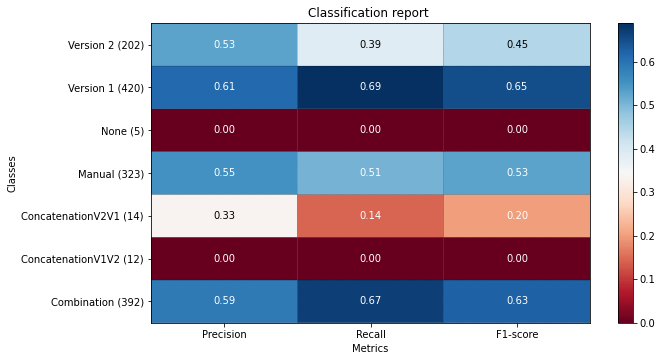

In [22]:
display(sample_project_rf.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project_rf.scores))

### Tuning hyperparameters (TODO)

# Random Forest (XGBoost)

### Base classifier

In [ ]:
rf_xg = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')
result_rf_xg = classifier_utils.ProjectsResults(rf_xg, projects, non_features_columns, drop_na=False)

In [24]:
report_rf_xg = result_rf_xg.get_report_df()

report_rf_xg

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
26,CCI-MIT__XCoLab,5512,5512,0.965,0.973,0.969,0.973,0.454,0.950
1,apache__directory-server,845,845,0.895,0.898,0.896,0.898,0.515,0.790
24,jgralab__jgralab,2072,2072,0.801,0.807,0.798,0.807,0.480,0.630
7,getrailo__railo,815,815,0.729,0.757,0.739,0.757,0.459,0.551
18,apache__accumulo,4113,4113,0.835,0.854,0.840,0.854,0.687,0.533
0,Ramblurr__Anki-Android,892,892,0.682,0.722,0.697,0.722,0.436,0.507
19,Unidata__thredds,1154,1154,0.874,0.880,0.860,0.880,0.775,0.465
11,TeamDev-Ltd__OpenFaces,2979,2979,0.954,0.959,0.956,0.959,0.924,0.458
10,CloudStack-extras__CloudStack-archive,1424,1424,0.697,0.702,0.682,0.702,0.453,0.456
5,apache__lucene-solr,1256,1256,0.583,0.599,0.587,0.599,0.289,0.436


### Inspect project

In [26]:
project = result_rf_xg.get_project('alexo__wro4j')

,precision,recall,f1-score,support
Combination,0.571709,0.648107,0.607516,449.000000
ConcatenationV1V2,0.000000,0.000000,0.000000,12.000000
ConcatenationV2V1,0.500000,0.142857,0.222222,14.000000
Manual,0.530612,0.423913,0.471299,368.000000
None,0.000000,0.000000,0.000000,6.000000
Version 1,0.532562,0.714563,0.610282,515.000000
Version 2,0.624242,0.344482,0.443966,299.000000
accuracy,0.553217,0.553217,0.553217,0.553217
macro avg,0.394161,0.324846,0.336469,1663.000000
weighted avg,0.553145,0.553217,0.539005,1663.000000


None

None

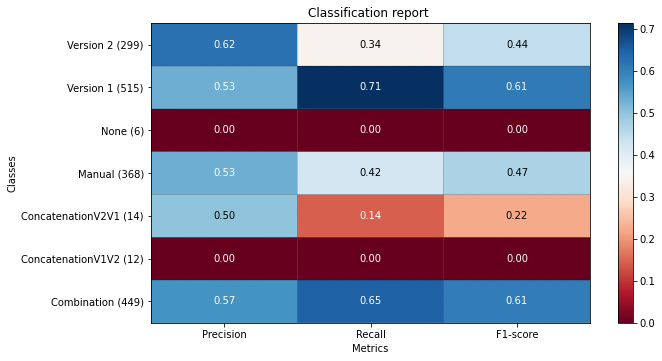

In [27]:
display(project.get_scores_df())
display(display(classifier_utils.plot_classification_report(project.scores)))

### Tuning hyperparameters (TODO)

# Tuned algorithms' comparison (TODO)

In [28]:
import importlib
importlib.reload(classifier_utils)
                 
# setup the algorithms with the desired parameters
algorithms = {}
algorithms['sklearn-decisionTree'] = DecisionTreeClassifier(min_samples_split=5, random_state=99)
# algorithms['sklearn-adaboost'] = AdaBoostClassifier(n_estimators=100, random_state=99)
algorithms['sklearn-randomForest'] = RandomForestClassifier(random_state=99)
# algorithms['xgBoost-randomForest'] = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')


results = []
for project in projects:
    for algorithm_name, algorithm in algorithms.items():
        row = []
        project_results = classifier_utils.evaluate_project(project, non_features_columns, algorithm)
        result = project_results.results
        precision = result.iloc[0]['precision']
        recall = result.iloc[0]['recall']
        f1_score = result.iloc[0]['f1-score']
        accuracy = result.iloc[0]['accuracy']
        majority_class = result.iloc[0]['baseline (majority)']
        improvement = result.iloc[0]['improvement']
        row = [project, algorithm_name, precision, recall, f1_score, accuracy, majority_class, improvement]
        results.append(row)
    
results = pd.DataFrame(results, columns=['project', 'algorithm', 'precision', 'recall', 'f1-score', 'accuracy', 'baseline (majority)', 'improvement'])
results.sort_values('improvement', ascending=False)
# print(results)
# pd.concat(results, ignore_index=True)

,project,algorithm,precision,recall,f1-score,accuracy,baseline (majority),improvement
53,CCI-MIT/XCoLab,sklearn-randomForest,0.970,0.974,0.971,0.974,0.573,0.938
52,CCI-MIT/XCoLab,sklearn-decisionTree,0.973,0.971,0.972,0.971,0.573,0.931
3,apache/directory-server,sklearn-randomForest,0.921,0.925,0.923,0.925,0.512,0.846
2,apache/directory-server,sklearn-decisionTree,0.922,0.923,0.923,0.923,0.512,0.843
49,jgralab/jgralab,sklearn-randomForest,0.871,0.873,0.871,0.873,0.491,0.751
21,CloudStack-extras/CloudStack-archive,sklearn-randomForest,0.801,0.807,0.802,0.807,0.437,0.657
48,jgralab/jgralab,sklearn-decisionTree,0.823,0.819,0.820,0.819,0.491,0.643
39,Unidata/thredds,sklearn-randomForest,0.905,0.914,0.906,0.914,0.777,0.613
37,apache/accumulo,sklearn-randomForest,0.847,0.855,0.850,0.855,0.635,0.602
38,Unidata/thredds,sklearn-decisionTree,0.902,0.901,0.901,0.901,0.777,0.557


## Comparing algorithms' reports

First let's merge the reports from Decision Tree, Random Forest and Random Forest XGBoost in a big table.

In [29]:
df_inner_dt_rf = pd.merge(report_dt, report_rf, on='project', how='inner', suffixes=('_dt', '_rf'))

df_xg = report_rf_xg.add_suffix("_xg").rename(columns={"project_xg": "project"})

df_inner_dt_rf_xg = pd.merge(df_inner_dt_rf,
                             df_xg,
                             on='project', how='inner')

df_inner_dt_rf_xg


,project,observations_dt,observations (wt NaN)_dt,precision_dt,recall_dt,f1-score_dt,accuracy_dt,baseline (majority)_dt,improvement_dt,observations_rf,observations (wt NaN)_rf,precision_rf,recall_rf,f1-score_rf,accuracy_rf,baseline (majority)_rf,improvement_rf,observations_xg,observations (wt NaN)_xg,precision_xg,recall_xg,f1-score_xg,accuracy_xg,baseline (majority)_xg,improvement_xg
0,CCI-MIT__XCoLab,5512,3757,0.973,0.971,0.972,0.971,0.573,0.931,5512,3757,0.970,0.974,0.971,0.974,0.573,0.938,5512,5512,0.965,0.973,0.969,0.973,0.454,0.950
1,apache__directory-server,845,652,0.922,0.923,0.923,0.923,0.512,0.843,845,652,0.921,0.925,0.923,0.925,0.512,0.846,845,845,0.895,0.898,0.896,0.898,0.515,0.790
2,jgralab__jgralab,2072,1802,0.823,0.819,0.820,0.819,0.491,0.643,2072,1802,0.871,0.873,0.871,0.873,0.491,0.751,2072,2072,0.801,0.807,0.798,0.807,0.480,0.630
3,Unidata__thredds,1154,950,0.902,0.901,0.901,0.901,0.777,0.557,1154,950,0.905,0.914,0.906,0.914,0.777,0.613,1154,1154,0.874,0.880,0.860,0.880,0.775,0.465
4,apache__accumulo,4113,3148,0.838,0.835,0.836,0.835,0.635,0.548,4113,3148,0.847,0.855,0.850,0.855,0.635,0.602,4113,4113,0.835,0.854,0.840,0.854,0.687,0.533
5,CloudStack-extras__CloudStack-archive,1424,1106,0.699,0.700,0.699,0.700,0.437,0.467,1424,1106,0.801,0.807,0.802,0.807,0.437,0.657,1424,1424,0.697,0.702,0.682,0.702,0.453,0.456
6,Ramblurr__Anki-Android,892,759,0.678,0.681,0.679,0.681,0.439,0.432,892,759,0.717,0.744,0.724,0.744,0.439,0.545,892,892,0.682,0.722,0.697,0.722,0.436,0.507
7,apache__lucene-solr,1256,974,0.573,0.568,0.569,0.568,0.266,0.411,1256,974,0.643,0.650,0.644,0.650,0.266,0.523,1256,1256,0.583,0.599,0.587,0.599,0.289,0.436
8,getrailo__railo,815,572,0.636,0.631,0.633,0.631,0.378,0.407,815,572,0.691,0.705,0.697,0.705,0.378,0.525,815,815,0.729,0.757,0.739,0.757,0.459,0.551
9,TeamDev-Ltd__OpenFaces,2979,2859,0.964,0.963,0.964,0.963,0.938,0.403,2979,2859,0.967,0.970,0.968,0.970,0.938,0.506,2979,2979,0.954,0.959,0.956,0.959,0.924,0.458


### How much accuracy improvement does each algorithm provide to the projects?

In [53]:
improvements = df_inner_dt_rf_xg.filter(regex=("project|improvement.*"))

# improvements

,project,improvement_dt,improvement_rf,improvement_xg
0,CCI-MIT__XCoLab,0.931,0.938,0.950
1,apache__directory-server,0.843,0.846,0.790
2,jgralab__jgralab,0.643,0.751,0.630
3,Unidata__thredds,0.557,0.613,0.465
4,apache__accumulo,0.548,0.602,0.533
5,CloudStack-extras__CloudStack-archive,0.467,0.657,0.456
6,Ramblurr__Anki-Android,0.432,0.545,0.507
7,apache__lucene-solr,0.411,0.523,0.436
8,getrailo__railo,0.407,0.525,0.551
9,TeamDev-Ltd__OpenFaces,0.403,0.506,0.458


In [59]:
cm = sns.light_palette("green", as_cmap=True)

improvements.style.background_gradient(cmap = cm).format({'improvement_dt' : "{:.2%}",
                           'improvement_rf' : "{:.2%}",
                           'improvement_xg': "{:.2%}"})

,project,improvement_dt,improvement_rf,improvement_xg
0,CCI-MIT__XCoLab,93.10%,93.80%,95.00%
1,apache__directory-server,84.30%,84.60%,79.00%
2,jgralab__jgralab,64.30%,75.10%,63.00%
3,Unidata__thredds,55.70%,61.30%,46.50%
4,apache__accumulo,54.80%,60.20%,53.30%
5,CloudStack-extras__CloudStack-archive,46.70%,65.70%,45.60%
6,Ramblurr__Anki-Android,43.20%,54.50%,50.70%
7,apache__lucene-solr,41.10%,52.30%,43.60%
8,getrailo__railo,40.70%,52.50%,55.10%
9,TeamDev-Ltd__OpenFaces,40.30%,50.60%,45.80%


## For each project, which algorithm provides the highest accuracy improvement?

In [31]:
winner_algo = improvements.set_index('project').idxmax(axis=1)

winner_algo

project
CCI-MIT__XCoLab                                                   improvement_xg
apache__directory-server                                          improvement_rf
jgralab__jgralab                                                  improvement_rf
Unidata__thredds                                                  improvement_rf
apache__accumulo                                                  improvement_rf
CloudStack-extras__CloudStack-archive                             improvement_rf
Ramblurr__Anki-Android                                            improvement_rf
apache__lucene-solr                                               improvement_rf
getrailo__railo                                                   improvement_xg
TeamDev-Ltd__OpenFaces                                            improvement_rf
zkoss__zk                                                         improvement_rf
freenet__fred                                                     improvement_rf
AOKP__frameworks_bas

## In how many projects does each algorithm provide the highest accuracy improvement?

In [34]:
winner_algo.groupby(winner_algo).size().sort_values(ascending=False)


improvement_rf    21
improvement_xg     7
improvement_dt     1
dtype: int64